In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
setosa = np.array(df.iloc[0:50, [0, 2]])
versicolor = np.array(df.iloc[50:100, [0, 2]])

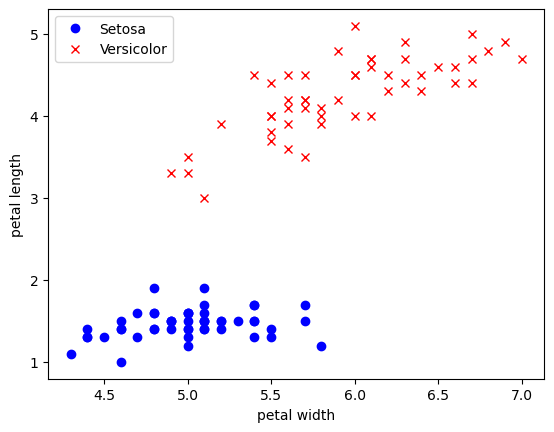

In [3]:
plt.plot(setosa[:, 0], setosa[:, 1], 'bo', label='Setosa')
plt.plot(versicolor[:, 0], versicolor[:, 1], 'rx', label='Versicolor')
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [4]:
class Perceptron():
    def __init__(self, eta=0.1, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])]
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, label in zip(X, y):
                update = self.eta * (label - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
X = df.iloc[0:100, [0, 2]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

ppn = Perceptron(n_iter=10)
ppn.fit(X, y)

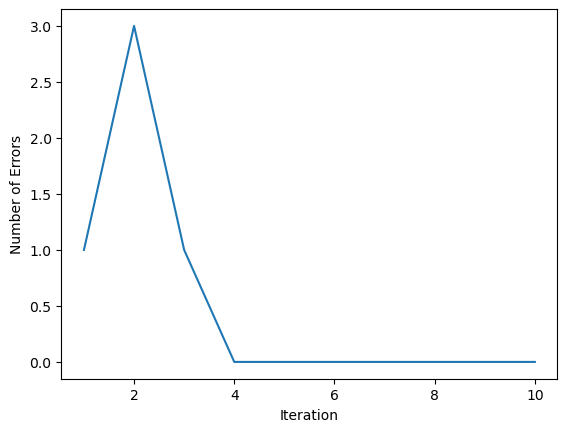

In [6]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.xlabel('Iteration')
plt.ylabel('Number of Errors')
plt.show()

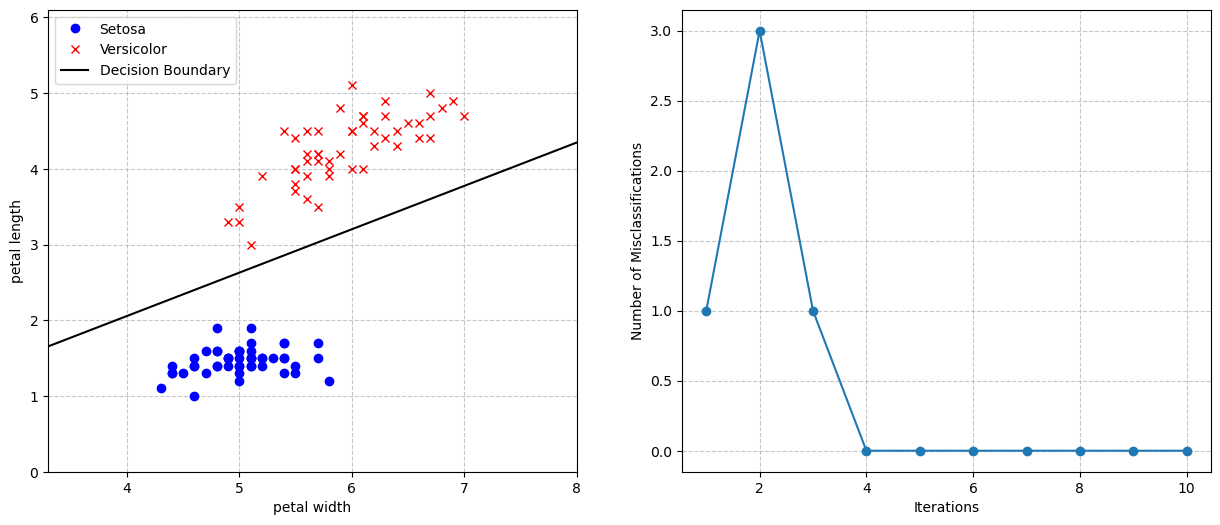

In [7]:
def plot_perceptron_results(X, y_classes, ppn):
    """
    Plot both the decision boundary and training errors for the perceptron.
    
    Parameters:
    -----------
    X : array-like, shape = [n_samples, 2]
        Training data
    y_classes : array-like, shape = [n_samples]
        Target values (-1 for Setosa, 1 for Versicolor)
    ppn : trained Perceptron object
        The trained perceptron model with weights_ and errors_ attributes
    """
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Decision Boundary
    # Calculate the decision boundary line
    # w[0] + w[1]*x + w[2]*y = 0  =>  y = (-w[1]/w[2])*x - w[0]/w[2]
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Decision boundary line
    x_boundary = np.array([x_min, x_max])
    y_boundary = -(ppn.w_[1]/ppn.w_[2])*x_boundary - ppn.w_[0]/ppn.w_[2]
    
    # Plot the data points
    ax1.plot(X[y_classes == -1, 0], X[y_classes == -1, 1], 'bo', label='Setosa')
    ax1.plot(X[y_classes == 1, 0], X[y_classes == 1, 1], 'rx', label='Versicolor')
    
    # Plot the decision boundary
    ax1.plot(x_boundary, y_boundary, 'k-', label='Decision Boundary')
    
    ax1.set_xlabel('petal width')
    ax1.set_ylabel('petal length')
    ax1.legend(loc='upper left')
    ax1.set_xlim([x_min, x_max])
    ax1.set_ylim([y_min, y_max])
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Plot 2: Training Errors
    ax2.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Number of Misclassifications')
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    #plt.tight_layout()
    plt.show()

# Plot the results
plot_perceptron_results(X, y, ppn)